# 1. Introduction

## 1.1 Personal Information 

Milestone 2 <br><br>
Nama  : I Nyoman Aditya Yudiswara <br>
Batch : FTDS-006

## 1.2 Background Problem
<p>
Acquired immunodeficiency syndrome (AIDS) is defined as an HIV infection with either a CD4+ T cell count below 200 cells per μL or the occurrence of specific diseases associated with HIV infection. Until 2024, there is no medicine to fully cure HIV, and AIDS is critical condition stage of HIV that can impact to death. <br>
To prevent people from HIV into AIDS there are many treaments or medicine to do that for example ZDV antiretroviral therapy. Because of that, AIDS-related deaths have been reduced by 69% since the peak in 2004 and by 51% since 2010. In 2022, around 630 000 [480 000–880 000] people died from AIDS-related illnesses worldwide, compared to 2.0 million [1.5 million–2.8 million] people in 2004 and 1.3 million [970 000–1.8 million] people in 2010. AIDS-related mortality has declined by 55% among women and girls and by 47% among men and boys since 2010. <br>
To keep this good progress, me as data scientist hava a task from goverment to classify people who has HIV that has potential to have AIDS based on their condition, behaviour, and therapy. 

</p>

## 1.3 Overview Plan to solve Background Problem
<p>
To solve this problem, me as data scientist want to make visualization or EDA my dataset that i get from goverment to describe current situation. After that i will do feature engineer to preapare my features so my model can train based on my ready features. I will compare KNN, SVM, Random Forest , and Decision tree by cross validation and choose the best model after that and do hyperparameter tuning with that. The metrics i will used for my model classification is recall and f1 because I want to make sure my model predict False Negative as low as possible. 
</p>

# 2. Import Library

In [1]:
# library that used to create and manipulate dataframe
import pandas as pd 
import numpy as np 

# library that used for visualization data
import matplotlib.pyplot as plt 

# library that used to split data train and data test
from sklearn.model_selection import train_test_split

# import library that used for check correlation between feature and label
import phik

# Library that used for pipeline and encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# library that used to check model performance
from sklearn.model_selection import cross_val_score

# Import Model algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# import library for model metric classification 
# from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# import library that used for parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

#package for export and import and model
import pickle
import json

from imblearn.over_sampling import SMOTE

# 3. Data Loading 

## 3.1 Quick Overview Data

In [2]:
# load data from file csv
df = pd.read_csv('AIDS_Classification_50000.csv')

In [3]:
# show top 10 data 
df.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
5,564,2,37,71.87923,0,1,0,90,0,1,...,1,2,0,1,1,520,543,740,694,1
6,406,0,27,86.94414,0,1,0,100,0,1,...,1,2,0,0,0,274,314,1563,664,0
7,1044,1,36,69.46018,0,1,1,90,0,0,...,0,1,0,1,1,338,640,2572,741,0
8,522,0,52,67.55010,0,1,0,100,0,1,...,1,1,0,1,1,418,513,1496,622,0
9,494,2,39,93.49177,0,1,0,100,0,0,...,1,3,1,1,1,375,330,1339,1398,0


In [4]:
# show bottom 10 data
df.tail(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
49990,471,2,45,66.91682,0,0,0,100,0,1,...,1,2,0,1,1,345,476,650,536,0
49991,1126,0,32,73.43903,0,0,0,100,0,1,...,1,3,0,1,0,384,360,918,673,0
49992,1139,3,34,76.30954,0,1,0,100,0,1,...,0,2,0,1,1,598,652,1412,800,0
49993,1115,2,41,75.56361,0,1,0,100,0,1,...,1,2,0,1,0,439,348,817,987,0
49994,952,1,27,69.26026,0,1,0,100,0,0,...,0,1,0,0,0,326,521,826,1257,0
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1
49999,612,2,41,77.12100,0,1,0,90,0,1,...,1,3,0,1,0,428,396,1002,696,0


In [5]:
# Check total column and row in dataframe
df.shape

(50000, 23)

From Code above we can know that my data has 50000 row data and 23 column

In [6]:
# Check total row data, detail column name and it's data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

Column definition : 
1. time = time take to liver failure ( in day )
2. trt = treatment indicator (0 = ZDV, 1 = ZDV + ddl, 2 = ZDV + Zal, 3 = ddl only ) 
3. age = age at baseline (in years)  
4. wtkg = weight at baseline (kg)
5. hemo: hemophilia (0 = no, 1=yes), Hemophilia is a rare disorder in which the blood doesn't clot in the typical way because it doesn't have enough blood-clotting proteins (clotting factors)
6. homo: homosexual activity (0 = no, 1 = yes)
7. drugs: history of IV drug use (0= no, 1=yes)
8. karnof: Karnofsky score (on a scale of 0 - 100), karnofsky score is index allows patients to be classified as their functional impairment. For detail can click [here](http://www.npcrc.org/files/news/karnofsky_performance_scale.pdf)
9. oprior = Non-ZDV antiretroviral therapy pre-175 (0= no, 1 = yes ), Non-ZDV refers to antiretrovial therapy that does not include Zidovudine (ZDV), which is older medication used to treat HIV/AIDS. pre-175 is study number or code. 
10. z30= ZDV in the 30 days prior to 175 ( 0 = no, 1 = yes). Zidovudine (ZDV) is antiretrovial medication used to prevent and treat HIV/AIDS. 30 days prior is the period 30 days precedding a particular event or time marker. 175 is study number or code
11. preanti = days pre-175 anti-retroviral therapy. I assume it is how many days patient take z30 therapy 
12. race = (0 = white, 1= non-white)
13. gender = (0 =  Female, 1 = Male)
14. str2 = antiretroviral ( 0 = naive, 1 = experienced)
15. strat = antiretroviral history stratification (1 = "Antiretroviral Naive", 2="Antiretroviral between 0 - 52 weeks", 3 = "Antiretroviral more than 52 weeks")
16. symptom = symptomatic indicator (0=asymp, 1=symp). It is parameter used in medical or research contexts to indicate whether an individual is showing symptomps of particular condition or disease. 
17. treat = treatment indicator (0=ZDV only, 1=others)
18. offtrt = indicator of off-trt before 96+/-5 weeks (0=no,1=yes)
19. cd40 = CD4 at baseline. CD4 is one of type white blood cell that usually called CD4 or cell T-Helper. It is one of important component from immunity body.
20. cd420 = CD4 at 20+/-5 weeks.
21. cd80 =  cd80 at baseline. CD80 is a transmembrane protein that functions as a co-stimulatory molecule in antigen-presenting cells, such as dendritic cells, macrophages, and B cells. 
22. cd820 = CD8 at 20+/-5 weeks
23. infected = is infected with AIDS (0 = No, 1 = Yes)


List column i assume as numeric continues : 
1. time 
2. age 
3. wtkg
4. karnof
5. preanti
6. cd40 
7. cd420
8. cd80 
9. cd820

List column i assume as categorial nominal are : 
1. hemo 
2. homo 
3. drugs 
4. oprior
5. z30
6. race 
7. gender
8. str2
9. symptom
10. treat
11. offtrt
12. infected
13. trt

List column i assume as categorial ordinal are : 
1. strat


List column i want to change it's data type are : 
1. `hemo` from int to object , because it is categorial and to make it easier when process feature engineer 
2. `homo` from int to object, because it is categorial and to make it easier when process feature engineer 
3. `drugs` from int to object, because it is categorial and to make it easier when process feature engineer 
4. `oprior` from int to object, because it is categorial and to make it easier when process feature engineer 
5. `z30` from int to object, because it is categorial and to make it easier when process feature engineer 
6. `race` from int to object, because it is categorial and to make it easier when process feature engineer 
7. `gender` from int to object, because it is categorial and to make it easier when process feature engineer 
8. `str2` from int to object, because it is categorial and to make it easier when process feature engineer 
9. `strat` from int to object, because it is categorial and to make it easier when process feature engineer 
10 `symptom` from int to object, because it is categorial and to make it easier when process feature engineer 
11. `treat` from int to object, because it is categorial and to make it easier when process feature engineer 
12. `offtrt` from int to object, because it is categorial and to make it easier when process feature engineer 
13. `infected` from int to object, because it is categorial and to make it easier when process feature engineer 
14. `trt` from int to object, because it is categorial and to make it easier when process feature engineer

Column that i want to be label for my model classification is `infected`

## 3.2 Overview column categorial 

### 3.2.1 Overview column hemo 

In [7]:
# Check unique value in column hemo
df['hemo'].unique()

array([0, 1])

In column hemo there is only 2 unique value, 0 indicate patient dont have hemophilia and 1 indicate patient have hemophilia

### 3.2.2 Overview column homo

In [8]:
# Check unique value in column homo
df['homo'].unique()

array([1, 0])

In column homo there is only 2 unique value, 0 indicate patient dont have homosexual activity and 1 indicate patient have homosexual activity

### 3.2.3 Overview column drugs

In [9]:
# Check unique value in column drugs
df['drugs'].unique()

array([0, 1])

In column drugs there is only 2 unique value, 0 indicate patient dont have history of IV drug use  and 1 indicate patient have history of IV drug use 

### 3.2.4 Overview column oprior

In [10]:
# Check unique value in column oprior
df['oprior'].unique()

array([0, 1])

In column oprior there is only 2 unique value, 0 indicate patient dont have Non-ZDV antiretroviral therapy pre-175 and 1 indicate patient have Non-ZDV antiretroviral therapy pre-175 

### 3.2.5 Overview column z30

In [11]:
# Check unique value in column z30
df['z30'].unique()

array([1, 0])

In column z30 there is only 2 unique value, 0 indicate patient dont have ZDV in the 30 days prior to 175  and 1 indicate patient have ZDV in the 30 days prior to 175  

### 3.2.6 Overview column race

In [12]:
# Check unique value in column race
df['race'].unique()

array([0, 1])

In column race there is only 2 unique value, 0 indicate patient is white race  and 1 indicate patient is non-white race 

### 3.2.7 Overview column gender

In [13]:
# Check unique value in column gender
df['gender'].unique()

array([1, 0])

In column gender there is only 2 unique value, 0 indicate patient is Female and 1 indicate patient is Male

### 3.2.8 Overview column str2

In [14]:
# Check unique value in column str2
df['str2'].unique()

array([1, 0])

In column str2 there is only 2 unique value, 0 indicate patient is Naive/ no experience with antiretroviral and 1 indicate patient is experience with antiretroviral

### 3.2.9 Overview column strat

In [15]:
# Check unique value in column strat
df['strat'].unique()

array([2, 3, 1])

In column gender there is only 3 unique value, 1 indicate patient is Antiretroviral Naive, 2 indicate patient is Antiretroviral between 0 - 52 weeks, 3 indicate patient is Antiretroviral more than 52 weeks

### 3.2.10 Overview column symptom

In [16]:
# Check unique value in column symptom
df['symptom'].unique()

array([0, 1])

In column symptom there is only 2 unique value, 0 indicate patient is asymp, 1 indicate patient is symp

### 3.2.11 Overview column treat

In [17]:
# Check unique value in column treat
df['treat'].unique()

array([1, 0])

In column symptom there is only 2 unique value, 0 indicate patient is ZDV only, 1 indicate patient is has other treatment beside ZDV

### 3.2.12 Overview column offtrt

In [18]:
# Check unique value in column offtrt
df['offtrt'].unique()

array([0, 1])

In column offtrt there is only 2 unique value, 0 indicate patient is no stop doing therapy before or around 96 weeks, 1 indicate patient is stop doing therapy before or around 96 weeks. 

### 3.2.13 Overview column infected 

In [19]:
# Check unique value in column infected
df['infected'].unique()

array([1, 0])

In column infected there is only 2 unique value, 0 indicate patient is not infected with AIDS, 1 indicate patient is indicate with AIDS.

### 3.2.14 Overview column trt

In [20]:
# Check unique value in column infected
df['trt'].unique()

array([1, 0, 3, 2])

In column infected there is only 4 unique value, 0 indicate patient is only take treatment ZDV, 1 indicate patient is take treatment ZDV + ddl, 2 indicate patient is take treatment ZDV + Zal, 3 indicate pation is only take ddl treatment.

## 3.3 Convert Data Type 

In [21]:
# Check data type before convert data type
df[['hemo','homo','drugs','oprior','z30','race','gender','str2','strat','symptom','treat','offtrt','trt']].dtypes

hemo       int64
homo       int64
drugs      int64
oprior     int64
z30        int64
race       int64
gender     int64
str2       int64
strat      int64
symptom    int64
treat      int64
offtrt     int64
trt        int64
dtype: object

In [22]:
# Convert data types from int to object so these column identify as object
df[['hemo','homo','drugs','oprior','z30','race','gender','str2','strat','symptom','treat','offtrt','trt']] = df[['hemo','homo','drugs','oprior','z30','race','gender','str2','strat','symptom','treat','offtrt','trt']].astype(object)

In [23]:
# Check data type after convert data type
df[['hemo','homo','drugs','oprior','z30','race','gender','str2','strat','symptom','treat','offtrt','trt']].dtypes

hemo       object
homo       object
drugs      object
oprior     object
z30        object
race       object
gender     object
str2       object
strat      object
symptom    object
treat      object
offtrt     object
trt        object
dtype: object

## 3.4 Overview column numerical

In [24]:
# Check summarize statistic column numeric
df.describe()

,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,34.164020,75.861991,96.831560,318.159560,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,7.091152,12.028730,5.091788,402.932765,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,12.000000,42.361620,76.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,29.000000,68.253682,90.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,34.000000,74.054115,100.000000,123.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,39.000000,81.142185,100.000000,503.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,68.000000,149.830870,100.000000,2828.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


## 3.5 Handling duplicate data 

In [25]:
# Check data duplicate in dataframe
df.duplicated().sum()

0

From code above we can know that my dataset dont have duplicate data

## 3.6 Check missing data value

In [26]:
# Check missing data value in my dataset
df.isnull().sum().sum()

0

From code above i can know that my dataset dont have missing data value

# 4. Exploratory Data Analysis (EDA)

In [27]:
# savepoint data loading before doing EDA
df_eda = pd.DataFrame(df)

## 4.1 Comparison people Not Infected and Infected By AIDS

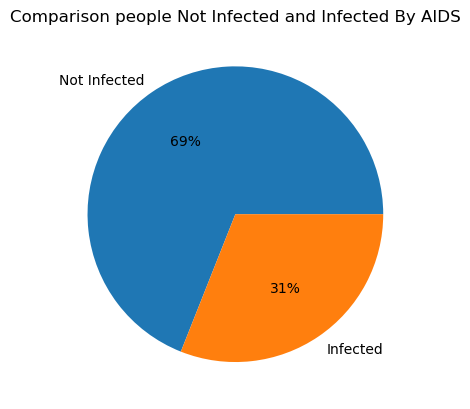

In [28]:
# This cell is used to make pie chart to compare people who infected and not infected by aids
data = df_eda.groupby(['infected']).size()

x = ["Not Infected", "Infected"]
y = data.values

plt.pie(y,labels=x,autopct='%1.0f%%')
plt.title("Comparison people Not Infected and Infected By AIDS")
plt.show()

From Graph above we can know that in my dataset people dominant not infected by AIDS. It is indicate that people already aware about danger AIDS and try to take therapy to prevent it before it's too late.

## 4.2 Distribution data people infected and not infected based on age

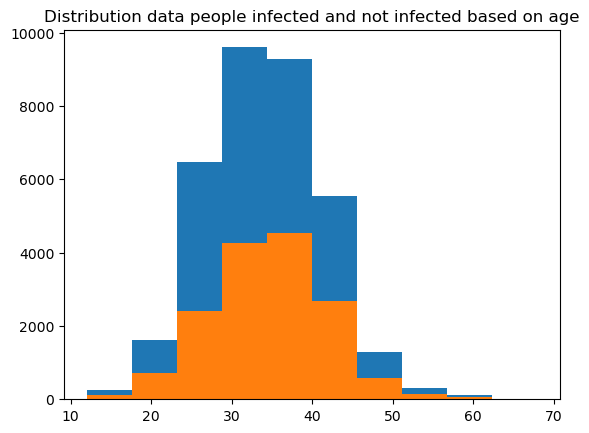

In [29]:
# This cell code is used to create histogram for visualize distribution data people infected and not infected based on age
data_0 = df_eda[df_eda['infected'] == 0]['age']
data_1 = df_eda[df_eda['infected'] == 1]['age']

plt.title("Distribution data people infected and not infected based on age")
plt.hist(data_0)
plt.hist(data_1)
plt.show()

From Graph above we can know distribution data people infected and not infected based on age has same pattern and dominant in range age 25 - 45. From this data, we can know people got infected AIDS or HIV when people is already teenager or adult. Goverment can make campaign for danger and anticipate HIV and AIDS around that age so the campaign can be more effective than target campaign to child or elder.

## 4.3 Percentage Homosexual and Heterosexual who have HIV

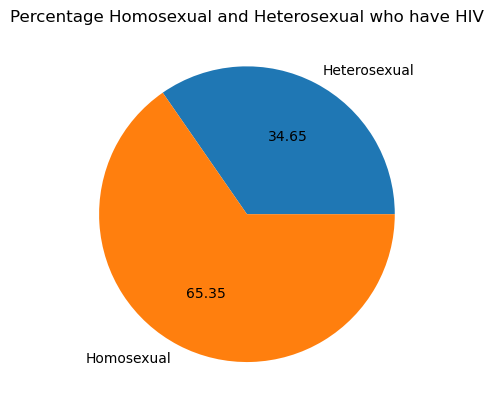

In [30]:
# This cell code is used to show pie chart percentage Homosexual and Heterosexual
data = df_eda.groupby('homo').size()
label = ['Heterosexual','Homosexual']
values = data.values

plt.pie(values,labels=label,autopct="%.2f")
plt.title("Percentage Homosexual and Heterosexual who have HIV")
plt.show()

From Graph above we can know that people total people who is homosexual that has HIV is more than Heterosexual. From my assumption this can be happened because they dont have to worry because somoene dont have to be preagnant. So with this data , i hope we can give this information to people who has homosexual activity that it has another bad impact beside that.

## 4.4 Distribution data people infected and not infected based on cd40

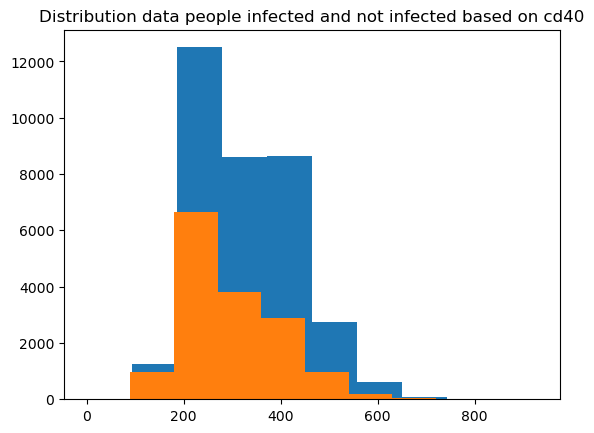

In [31]:
# This cell code is used to create histogram for visualize distribution data people infected and not infected based on age
data_0 = df_eda[df_eda['infected'] == 0]['cd40']
data_1 = df_eda[df_eda['infected'] == 1]['cd40']

plt.title("Distribution data people infected and not infected based on cd40")
plt.hist(data_0)
plt.hist(data_1)
plt.show()

Cd40 is used as important metrix to determine people immunity who has HIV. Based graph above, we can know that people who has AIDS has the most CD40 arount 180 - 300. This can be warning area for every who has HIV to be more careful if has CD40 almost at that point. 

## 4.5 Distribution Data patient who has aids based on their treatment type

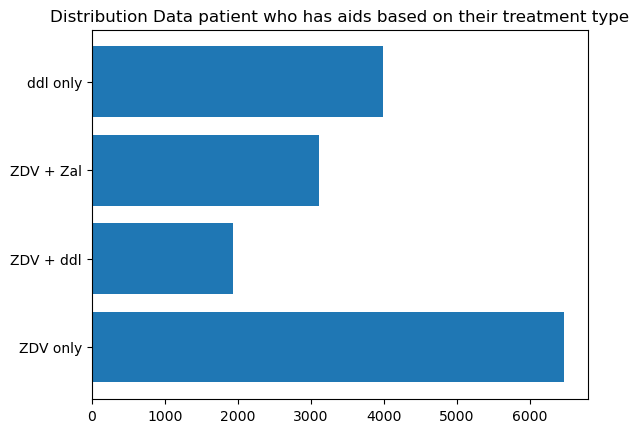

In [32]:
# This cell is used to create bar horizontal for distribution data who has AIDS based on treatment type
data = df_eda[df_eda['infected'] == 1].groupby('trt').size()
labels = ['ZDV only','ZDV + ddl','ZDV + Zal','ddl only']
values = data.values

plt.barh(labels,values)
plt.title("Distribution Data patient who has aids based on their treatment type")
plt.show()

Based on graph above we can know the most people who has AIDS is only take ZDV treatment and ZDV + ddl is the lowest. I can assume that goverment can remove treatment for only ZDV only and increase treatment for ZDV + ddl for increase number suvivor

## 4.6 Percentage Race White and Non-White

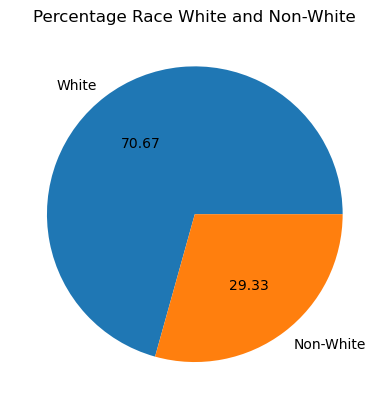

In [33]:
# This cell code is used to show pie chart percentage Race white and non-white
data = df_eda.groupby('race').size()
label = ['White','Non-White']
values = data.values

plt.pie(values,labels=label,autopct="%.2f")
plt.title("Percentage Race White and Non-White")
plt.show()

From Graph above we can know that total people with race white who has HIV is more than non-white. This can be happening by many factor, based on race white beahviour, tradition, believes, habit, etc. So my suggestion is to create film or another socialize method to more race white people aware about HIV and how to prevent it. 

## 4.7 Distribution data people infected and not infected based on cd80

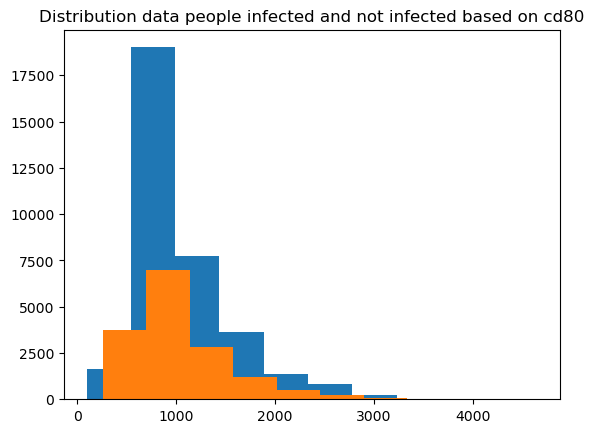

In [34]:
# This cell code is used to create histogram for visualize distribution data people infected and not infected based on age
data_0 = df_eda[df_eda['infected'] == 0]['cd80']
data_1 = df_eda[df_eda['infected'] == 1]['cd80']

plt.title("Distribution data people infected and not infected based on cd80")
plt.hist(data_0)
plt.hist(data_1)
plt.show()

CD80 is a transmembrane protein that functions as a co-stimulatory molecule in antigen-presenting cells, such as dendritic cells, macrophages, and B cells. Based graph above, we can know that people who has AIDS has the most CD80 arount 800 - 1200. This can be warning area for every who has HIV to be more careful if has CD80 almost at that point. 

# 5. Feature Engineering

In [35]:
# Save point data loading before do feature engineering
df_fe = pd.DataFrame(df)

## 5.1 Split Data Train and Data Test

In [36]:
# Filter X for just features and y is label for classification
X = df_fe.drop(columns=['infected'])
y = df_fe[['infected']]

# Split data train and data test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (40000, 22)
X_test shape =  (10000, 22)


## 5.2 Handling Missing Value in Data Train

In [37]:
# Check missing value in X_train
X_train.isnull().sum().sum()

0

In [38]:
# check missing value in y_train
y_train.isnull().sum()

infected    0
dtype: int64

From code above we can know that in my X_train and y_train dont have missing data value

## 5.3 Handling Outlier

In [39]:
# Check Skew Outlier for column numeric
X_train_numeric =  X_train.select_dtypes(exclude=object)
X_train_numeric_column = X_train_numeric.columns.values
dict_column_skew_before = {}
for column_name in X_train_numeric_column:
    dict_column_skew_before[column_name] = X_train_numeric[column_name].skew()
dict_column_skew_before

{'time': -0.6124048154260049,
 'age': 0.20425479178229017,
 'wtkg': 1.1935174066286411,
 'karnof': -1.2477634172605605,
 'preanti': 1.2312295767213504,
 'cd40': 0.6350598428783585,
 'cd420': 0.7002469101129888,
 'cd80': 1.643393661922864,
 'cd820': 1.1723707662859797}

In [40]:
def handling_outlier_per_column(column_name,dataframe):
    '''
    This function is used to handling outlier in dataframe in specific column_name 

    Parameter  Description 
    ==========================
    column_name = name column in dataframe 
    dataframe = dataframe in pandas

    Example Usage 
    ==========================
    handling_outlier_per_column(column_name,dataframe)
    
    Output : Dataframe with after capping outlier

    '''
    skew = dataframe[column_name].skew()
    # Handling outlier if distrubiton data normal
    if skew <= 0.5 and skew >= -0.5 :
        
        mean = dataframe[column_name].mean()
        std = dataframe[column_name].std()

        lower_bound = mean - 3*std 
        upper_bound = mean + 3*std
        outlier = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
        if len(outlier) > 0:
            dataframe[column_name] = dataframe[column_name].clip(lower=lower_bound,upper=upper_bound)
    # Handling outlier if distribution data skew
    elif (skew > 0.5 and skew <=1) or (skew < -0.5 and skew >= -1) :
        q1 = dataframe[column_name].quantile(0.25)
        q3 = dataframe[column_name].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outlier = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
        if len(outlier) > 0:
            dataframe[column_name] = dataframe[column_name].clip(lower=lower_bound,upper=upper_bound)
    # Handling outlier if distribution data ekstreme skew 
    else: 
        q1 = dataframe[column_name].quantile(0.25)
        q3 = dataframe[column_name].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 3*iqr
        upper_bound = q3 + 3*iqr
        outlier = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
        if len(outlier) > 0:
            dataframe[column_name] = dataframe[column_name].clip(lower=lower_bound,upper=upper_bound)
    return dataframe


In [41]:
def handling_outlier_dataframe(dataframe):
    '''
    This function is used to handling outlier dataframe for every column 
    
    Parameter Description 
    ====================== 
    dataframe = dataframe in pandas 

    Example usage 
    ==================
    handling_outlier_dataframe(X_train) 
    
    Output : dataframe after handling outlier
    '''
    list_column = dataframe.columns.to_list()
    list_column_numeric = []
    for column in list_column:
        if dataframe[column].dtype == 'float64' or dataframe[column].dtype == 'int64':
            list_column_numeric.append(column)

    for column_name in list_column_numeric:
        dataframe = handling_outlier_per_column(column_name,dataframe)

    return dataframe

In [42]:
# Called function to handling to handling outlier in X_train
X_train = handling_outlier_dataframe(X_train)

In [43]:
# Check Skew Outlier in X_train
X_train_numeric =  X_train.select_dtypes(exclude=object)
X_train_numeric_column = X_train_numeric.columns.values
dict_column_skew_before = {}
for column_name in X_train_numeric_column:
    dict_column_skew_before[column_name] = X_train_numeric[column_name].skew()
dict_column_skew_before

{'time': -0.6124048154260049,
 'age': 0.1405439642238668,
 'wtkg': 1.0510980151244769,
 'karnof': -1.2477634172605605,
 'preanti': 1.2099008480315785,
 'cd40': 0.5714965451295323,
 'cd420': 0.5671753328891723,
 'cd80': 1.4981146629722446,
 'cd820': 1.075397771385976}

We can see skew before and after handling has decrased skew value

## 5.4 Feature Selection

In [44]:
# Add column y_train to X_train for check features correlation with label 
X_train = pd.concat([X_train,y_train],axis=1)

In [45]:
# Check correlation between my features and label so i can assume my own threshold corr value for feature selection
X_train.phik_matrix().loc['infected']

interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']


time        0.138363
trt         0.101284
age         0.064771
wtkg        0.076280
hemo        0.041492
homo        0.000000
drugs       0.043578
karnof      0.025839
oprior      0.074367
z30         0.366300
preanti     0.270372
race        0.046744
gender      0.027245
str2        0.365497
strat       0.156702
symptom     0.041041
treat       0.088741
offtrt      0.040887
cd40        0.198231
cd420       0.254739
cd80        0.034515
cd820       0.041761
infected    1.000000
Name: infected, dtype: float64

Based on these list, i will my thershold corr value for feature selection with more than 0.06. 

In [46]:
def feature_selection(dataframe,label_name,threshold_correlation):
    '''
    This function is used to filter X_train when feature has correlation more than 0.12 or less than -0.12 
    with label 

    parameter description
    ========================
    dataframe = dataframe that used to filter selection
    label_name = name label that used to check it's correlation with feature 
    threshold_correlation =  value minimum correlation between feature and label 

    usage example 
    ========================
    feature_selection(X_train,'default_payment_next_month')

    This function will return dataframe that has already been feature selection based on correlation between 
    '''
    for i in X_train:
        corr_coef = dataframe.phik_matrix().loc[label_name].loc[i]
        if -abs(threshold_correlation) < corr_coef < threshold_correlation:
            dataframe = dataframe.drop(i, axis=1)
        else:
            pass
    return dataframe

In [47]:
# called function feature_selection to feature selection in X_train
X_train = feature_selection(X_train,'infected',0.06)

interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']
interval columns not set, guessing: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd82

In [48]:
# drop column default_payment_next_month in X_train
X_train = X_train.drop(columns=['infected'],axis=1)

In [49]:
# filter column X_test same like X_train
X_test = X_test[X_train.columns.values]

In [50]:
print("X_train shape = ",X_train.shape)
print("X_train columns = ",X_train.columns)
print("X_train total columns = ",len(X_train.columns))

X_train shape =  (40000, 12)
X_train columns =  Index(['time', 'trt', 'age', 'wtkg', 'oprior', 'z30', 'preanti', 'str2',
       'strat', 'treat', 'cd40', 'cd420'],
      dtype='object')
X_train total columns =  12


In [51]:
print("X_test shape = ",X_test.shape)
print("X_test columns = ",X_test.columns)
print("X_test columns = ",len(X_test.columns))

X_test shape =  (10000, 12)
X_test columns =  Index(['time', 'trt', 'age', 'wtkg', 'oprior', 'z30', 'preanti', 'str2',
       'strat', 'treat', 'cd40', 'cd420'],
      dtype='object')
X_test columns =  12


After process feature selection , i have reduced feature that i will used for model train from 24 to 12 with threshold corr value more than 0.6.

## 5.5 Check multicolinearity

In [52]:
# check data type in my features
X_train.dtypes

time         int64
trt         object
age        float64
wtkg       float64
oprior      object
z30         object
preanti      int64
str2        object
strat       object
treat       object
cd40         int64
cd420        int64
dtype: object

Because my features are not all numeric, so i will check my feature multicolinearity  by check their correlation and point of view business.

In [53]:
# Check correlation between features in X_train
X_train.phik_matrix()

interval columns not set, guessing: ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420']


,time,trt,age,wtkg,oprior,z30,preanti,str2,strat,treat,cd40,cd420
time,1.000000,0.063553,0.012197,0.039315,0.019921,0.126844,0.115617,0.145513,0.148848,0.105658,0.055473,0.116115
trt,0.063553,1.000000,0.046051,0.029172,0.000000,0.056600,0.036000,0.052704,0.032198,0.398197,0.020968,0.063110
age,0.012197,0.046051,1.000000,0.037361,0.012915,0.167580,0.113221,0.169061,0.151792,0.054326,0.059212,0.084224
wtkg,0.039315,0.029172,0.037361,1.000000,0.000000,0.137462,0.084173,0.136359,0.114909,0.007138,0.059279,0.073408
oprior,0.019921,0.000000,0.012915,0.000000,1.000000,0.091661,0.080709,0.103821,0.043584,0.005697,0.053139,0.054859
z30,0.126844,0.056600,0.167580,0.137462,0.091661,1.000000,0.634426,0.814540,0.379060,0.010427,0.286469,0.374233
preanti,0.115617,0.036000,0.113221,0.084173,0.080709,0.634426,1.000000,0.683849,0.550671,0.029498,0.229179,0.292164
str2,0.145513,0.052704,0.169061,0.136359,0.103821,0.814540,0.683849,1.000000,0.407805,0.034703,0.312935,0.403323
strat,0.148848,0.032198,0.151792,0.114909,0.043584,0.379060,0.550671,0.407805,1.000000,0.009475,0.287678,0.361846
treat,0.105658,0.398197,0.054326,0.007138,0.005697,0.010427,0.029498,0.034703,0.009475,1.000000,0.033549,0.063898


Based on my threshold feature corr value that multicollinearity is above 0.5 , then i got these feature that in type multicolinearity :
- z30 -> preanti = 0.63
- z30 -> str2 = 0.8 
- preanti -> str2 = 0.68

Based on point of view business str2 can replace z30 and preanti because str2 provide indicator if patient has history to do all type treatment, different with z30 that just indicate therapy for type ZDV and preanti is total day therapy. because of that reason i will delete z30 and preanti to prevent my data from multicollinearity

In [54]:
# Drop colomn z30 and preanti in X_train
X_train = X_train.drop(columns=['z30','preanti'],axis=1)

In [55]:
# filter column X_test same like X_train
X_test = X_test[X_train.columns.values]

In [56]:
# Check correlation between features in X_train
X_train.phik_matrix()

interval columns not set, guessing: ['time', 'age', 'wtkg', 'cd40', 'cd420']


,time,trt,age,wtkg,oprior,str2,strat,treat,cd40,cd420
time,1.000000,0.063553,0.012197,0.039315,0.019921,0.145513,0.148848,0.105658,0.055473,0.116115
trt,0.063553,1.000000,0.046051,0.029172,0.000000,0.052704,0.032198,0.398197,0.020968,0.063110
age,0.012197,0.046051,1.000000,0.037361,0.012915,0.169061,0.151792,0.054326,0.059212,0.084224
wtkg,0.039315,0.029172,0.037361,1.000000,0.000000,0.136359,0.114909,0.007138,0.059279,0.073408
oprior,0.019921,0.000000,0.012915,0.000000,1.000000,0.103821,0.043584,0.005697,0.053139,0.054859
str2,0.145513,0.052704,0.169061,0.136359,0.103821,1.000000,0.407805,0.034703,0.312935,0.403323
strat,0.148848,0.032198,0.151792,0.114909,0.043584,0.407805,1.000000,0.009475,0.287678,0.361846
treat,0.105658,0.398197,0.054326,0.007138,0.005697,0.034703,0.009475,1.000000,0.033549,0.063898
cd40,0.055473,0.020968,0.059212,0.059279,0.053139,0.312935,0.287678,0.033549,1.000000,0.184549
cd420,0.116115,0.063110,0.084224,0.073408,0.054859,0.403323,0.361846,0.063898,0.184549,1.000000


From code above i can sure that my X_train don't have multicollinearity anymore

## 5.6 Check Cardinality

In [57]:
def check_cardinality_dataframe(dataframe,threshold_total_unique):
    '''
    This function is used for check high cardinality in dataframe 

    parameter description 
    ==========================
    dataframe = dataframe that will used to check it's column cardinality 
    threshold_total_unique = minimal threshold total unique that will be used selection high cardinality

    usage example 
    =========================
    check_cardinality_dataframe(X_train,10)

    This function will return list column name that has high cardinality
    '''
    list_column_high_cardinality = []
    list_column_name = dataframe.select_dtypes(include=object).columns.values
    for column_name in list_column_name:
        total_unique_value = dataframe[column_name].nunique()
        if total_unique_value > threshold_total_unique:
            total_high_cardinality += 1
            list_column_high_cardinality.append(column_name)
    return list_column_high_cardinality


In [58]:
# This function is used to check 
list_column_high_cardinality = check_cardinality_dataframe(X_train,10)
list_column_high_cardinality

[]

From here we can know that X_train doesnt have high cardinality

## 5.7 Data Balancing

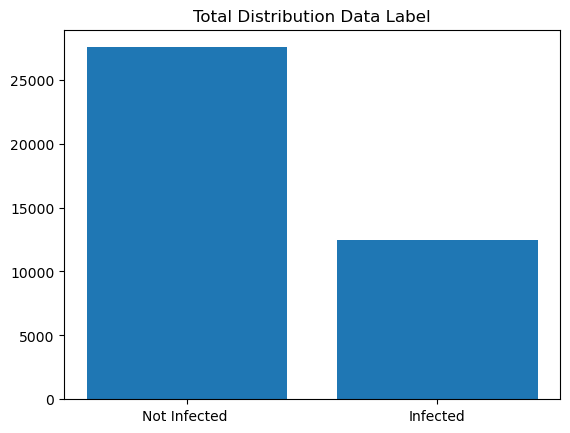

In [59]:
# Visualize my label data distributin to check data balancing
data = y_train.groupby(['infected']).size()
labels = ['Not Infected ', 'Infected']
values = data.values

plt.bar(labels,values)
plt.title("Total Distribution Data Label")
plt.show()

In Graph above i know that my label distribution data is really not balanced, my class not infected has size double from class infected. Because of that i must solve this problem with data balancing using SMOTE. Before doing SMOTE, i must encode and scaler my features in X_train first.

In [60]:
# split column name based on categorial and numeric 
num_col = X_train.select_dtypes(include=np.number).columns.values
cat_col = X_train.select_dtypes(include='object').columns.values
print("column numeric = ",num_col)
print("column categorial = ",cat_col)

column numeric =  ['time' 'age' 'wtkg' 'cd40' 'cd420']
column categorial =  ['trt' 'oprior' 'str2' 'strat' 'treat']


In [61]:
cat_col_nominal = ['trt','oprior','str2','treat']
# cat_col_nominal = ['trt','oprior','str2','drugs','race','offtrt']
cat_col_ordinal = ['strat']


In [62]:
# Reshape from 1 dimension to 2 dimension
X_train_cat_nominal = X_train[cat_col_nominal]
X_test_cat_nominal = X_test[cat_col_nominal]

# Initialize and fit the encoder
encoderNominal = OneHotEncoder()
list_column_encoder_name = encoderNominal.fit(X_train_cat_nominal).get_feature_names_out()

# Transform the data name 
X_train_cat_nominal_encoded = encoderNominal.transform(X_train_cat_nominal).toarray()
X_test_cat_nominal_encoded = encoderNominal.transform(X_test_cat_nominal).toarray()

In [63]:
# This cell is used to encode column categorial ordinal
X_train_cat_ordinal = X_train[cat_col_ordinal]
X_test_cat_ordinal = X_test[cat_col_ordinal]

encoderOrdinal = OrdinalEncoder()
encoderOrdinal.fit(X_train_cat_ordinal)

X_train_cat_ordinal_encoded = encoderOrdinal.transform(X_train_cat_ordinal)
X_test_cat_ordinal_encoded = encoderOrdinal.transform(X_test_cat_ordinal)

In [64]:
# Check skewness in feature numeric
X_train[num_col].skew()

time    -0.612405
age      0.140544
wtkg     1.051098
cd40     0.571497
cd420    0.567175
dtype: float64

Because all my feature numeric dont have normal distribution data so i will use MinMaxScaler to transform my feature numeric.

In [65]:
# This cell is used to transform feature numeric using MinMaxScaler
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

scaler = MinMaxScaler()
X_train_num_encoded = scaler.fit_transform(X_train_num)
X_test_num_encoded = scaler.fit_transform(X_test_num)

In [66]:
# Concat feature categorial that already encoded and feature numeric that already transform in data test and data train
X_train_encoded =  np.concatenate([X_train_num_encoded,X_train_cat_nominal_encoded,X_train_cat_ordinal_encoded],axis=1)
X_test_encoded =  np.concatenate([X_test_num_encoded,X_test_cat_nominal_encoded,X_test_cat_ordinal_encoded],axis=1)

In [67]:
# Data balancing using SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# 6. Model Definition

## 6.1 Cross Validation

In [68]:
# Doing cross validation for every chosen algorithm modelling in X_train
cv_rf = cross_val_score(RandomForestClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring='recall', n_jobs=-1)
cv_knn = cross_val_score(KNeighborsClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring='recall', n_jobs=-1)
cv_svc = cross_val_score(SVC(), X_train_balanced, y_train_balanced, cv=5, scoring='recall', n_jobs=-1)
cv_dt = cross_val_score(DecisionTreeClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring='recall', n_jobs=-1)
cv_ada = cross_val_score(AdaBoostClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring='recall', n_jobs=-1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

In [69]:
# looping to find best model based on cross validation before
name_model = []
cv_score = 0
for cv,name in zip([cv_rf, cv_knn, cv_svc,cv_dt,cv_ada],
                   ['rf','knn','svc','dt','ada']):
    print(name)
    print(f'recall - All - Cross Validation : {cv}')
    print(f'recall - Mean - Cross Validation : {cv.mean()}')
    print(f'recall - Std - Cross Validation : {cv.std()}')
    print(f'recall - Range - Cross Validation : {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
    print('-'*50)
    if cv.mean() > cv_score:
        cv_score = cv.mean()
        best_model = name
    else:
      pass
print(f'Cross Validation mean from  : {cv_score}')
print(f'Best Model : {best_model}')

rf
recall - All - Cross Validation : [0.71036862 0.70165244 0.82077356 0.87724714 0.87561286]
recall - Mean - Cross Validation : 0.7971309242781913
recall - Std - Cross Validation : 0.07717620566600888
recall - Range - Cross Validation : 0.7199547186121824 - 0.8743071299442002
--------------------------------------------------
knn
recall - All - Cross Validation : [0.7499546  0.74087525 0.82458689 0.87161794 0.86417287]
recall - Mean - Cross Validation : 0.8102415108044309
recall - Std - Cross Validation : 0.05536720519278708
recall - Range - Cross Validation : 0.7548743056116438 - 0.8656087159972179
--------------------------------------------------
svc
recall - All - Cross Validation : [0.72852733 0.72979844 0.74214636 0.72235337 0.73542764]
recall - Mean - Cross Validation : 0.7316506264753949
recall - Std - Cross Validation : 0.006694039341329617
recall - Range - Cross Validation : 0.7249565871340653 - 0.7383446658167245
--------------------------------------------------
dt
recall 

After cross validation , the best model for my dataset is RandomForest. But after i try using RandomForest as my model algorithm to train, predict, hyperparameter tuning, and evaluation it's recall score is overfit. Before HyperParameter tuning it has recall score 0.8 for data train and 0.6 for data test. And after hyper parameter tuning it has recall score 1 for data train and 0.6 for data test. <br>
Because KNN is overfitting, so i choose SVC it is the best three model algorithm based on recall score mean and it is good fit based on it's std. And it's score is recall score is more than 0.7 which is not really bad performance and it still good fit.

In [70]:
# Model training RF 
model_svc = SVC()
model_svc.fit(X_train_balanced,y_train_balanced)

# model_knn = SVC()
# model_knn.fit(X_train_balanced,y_train_balanced)

# model_rf = RandomForestClassifier()
# model_rf.fit(X_train_balanced,y_train_balanced)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

## 6.2 Model Definition 

After doing cross validation with three algorithm supervised classification "KNNeigbordClassifier", "RandomForestClassifier", "Decision Tree", and "SVM" to my dataset. And with compare their recall mean and my assumption, the best algorithm for my dataset is SVM. <br>
The reason i choose <i>recall</i> as my metric to evaluate my model classification becuase i want to create model to minimze False Negative (Model predict patient not infected but actual indected) <br>
Because i use SVM as my model training, i will use hyperparameter like <i>C (Regularization)</i> , <i>Gamma</i> and <i>kernel</i>

# 7. Model evaluation before hyperparameter tuning

In [71]:
# Create list to save evaluation before and after hyperparameter tuning
list_confusion_matrix_train_before = []
list_confusion_matrix_test_before = []
list_recall_score_before = []

In [72]:
def model_evaluation(model,data_train,data_test):
    list_confusion_matrix_train = []
    list_confusion_matrix_test= []
    list_recall_score = []
    # predict using model svm after hyper parameter tuning
    y_pred_train_dt_1_tuning =  model.predict(data_train)
    y_pred_test_dt_1_tuning =  model.predict(data_test)

    # Show Confusion Matrix in data training with model after hyperparameter tuning
    cm_train = confusion_matrix(y_train, y_pred_train_dt_1_tuning)
    list_confusion_matrix_train = cm_train
    ConfusionMatrixDisplay(cm_train).plot()

    # Show Confusion Matrix in data testing with model after hyperparameter tuning
    cm_test = confusion_matrix(y_test, y_pred_test_dt_1_tuning)
    list_confusion_matrix_test = cm_test
    ConfusionMatrixDisplay(cm_test).plot()

    # check f1 score with data train anda data test and save them to list
    print("Recall Score for train = ",recall_score(y_train,y_pred_train_dt_1_tuning))
    print("Recall Score for test = ",recall_score(y_test,y_pred_test_dt_1_tuning))
    list_recall_score.append(recall_score(y_train,y_pred_train_dt_1_tuning))
    list_recall_score.append(recall_score(y_test,y_pred_test_dt_1_tuning))

    return list_confusion_matrix_train,list_confusion_matrix_test,list_recall_score

Recall Score for train =  0.7317288407541115
Recall Score for test =  0.7280499835580401


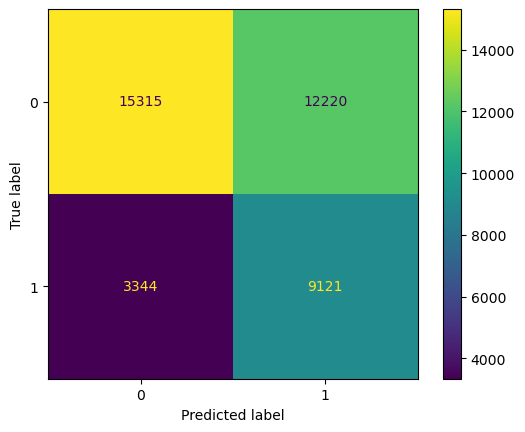

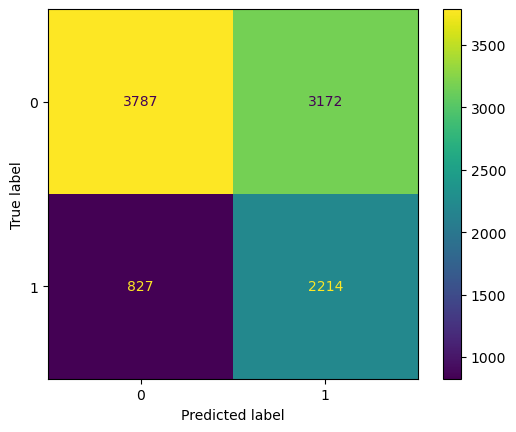

In [73]:
list_confusion_matrix_train_before,list_confusion_matrix_test_before,list_recall_score_before = model_evaluation(model_svc,X_train_encoded,X_test_encoded)

# 8. HyperParameter Tuning

In [74]:
grid_search_params = {
    'C': [1,10,20,30,40,50,60,70,80,90,100],
    'gamma':['scale','auto'],
    'kernel':['linear','rbf']
}

svc_best = RandomizedSearchCV(
    estimator=model_svc,
    param_distributions=grid_search_params,
    n_iter=1,
    random_state=3,
    cv=5,
    n_jobs=-1,
    scoring='recall'
)

# doing model training using best parameter from SVM
svc_best.fit(X_train_balanced, y_train_balanced)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80,
                                              90, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=3, scoring='recall')

In [75]:
# Show best parameter in SVM after hyperparameter tuning
svc_best.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 70}

# 8. Model Evaluation after hyperparameter tuning

Recall Score for train =  0.7338146811070999
Recall Score for test =  0.7329825715225254


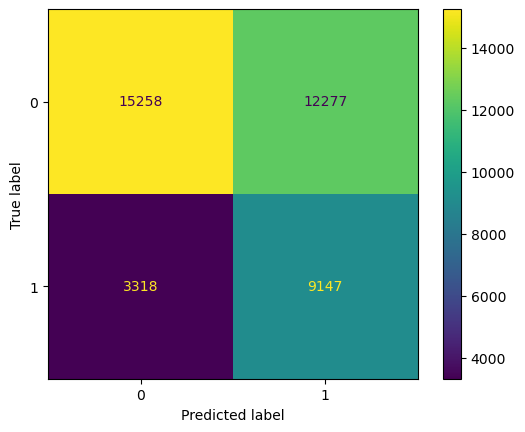

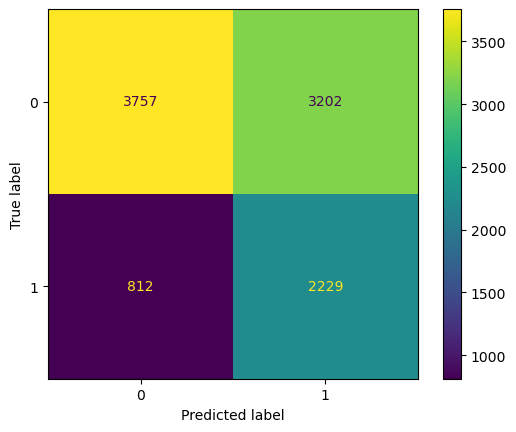

In [77]:
list_confusion_matrix_train_after,list_confusion_matrix_test_after,list_recall_score_after = model_evaluation(svc_best,X_train_encoded,X_test_encoded)

After doing hyperparameter tuning i can assume that my model has improvement by change from overfit to good fit. And it's recall score after hyperparameter tuning is not decrased. And from confusion matrix i can see that my model still hard to clasify True positive and True Negative around 50 % 

In [78]:
# This cell is used to create dataframe to evaluate pattern data that has factor with result prediction
y_pred_test_svm_1_tuning =  svc_best.predict(X_test_encoded)
predict = pd.DataFrame(y_pred_test_svm_1_tuning,columns=['predict'])
y_test_2 = y_test.reset_index()
y_test_2 = y_test_2.drop(columns=['index'],axis=1)
X_test_2 =  X_test.reset_index()
X_test_2 = X_test_2.drop(columns=['index'],axis=1)
X_test_eval = pd.DataFrame(X_test_2)
X_test_eval['infected'] = y_test_2
X_test_eval['predict'] = predict
X_test_eval

,time,trt,age,wtkg,oprior,str2,strat,treat,cd40,cd420,infected,predict
0,1173,1,28,106.21450,0,0,1,1,433,342,0,0
1,1109,2,30,70.82447,0,0,1,0,490,342,0,0
2,148,3,43,85.95847,0,1,2,0,259,341,0,1
3,936,2,42,95.33119,0,1,1,1,190,328,0,0
4,574,0,39,78.54008,0,0,1,1,208,528,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,550,1,29,74.10156,0,1,3,1,256,163,1,1
9996,1131,3,33,83.81671,0,0,1,1,203,527,0,0
9997,957,3,31,93.91868,0,0,1,0,392,613,0,0
9998,425,3,35,89.76474,0,0,3,1,426,488,1,0


In [79]:
# create data frame that has true and false classification
df_false_classification =  X_test_eval[X_test_eval['infected'] != X_test_eval['predict']]
df_true_classification = X_test_eval[X_test_eval['infected'] == X_test_eval['predict']]

In [80]:
# create dataframe has False Negative
df_false_classification_FN = df_false_classification[df_false_classification['infected'] == 0]

In [81]:
df_false_classification_FN.head()

,time,trt,age,wtkg,oprior,str2,strat,treat,cd40,cd420,infected,predict
2,148,3,43,85.95847,0,1,2,0,259,341,0,1
10,1014,0,26,54.04306,1,1,3,0,350,384,0,1
12,731,0,28,90.51504,0,1,3,1,215,660,0,1
16,1170,0,35,66.32620,0,1,2,1,299,398,0,1
17,546,2,39,63.87739,0,1,2,1,150,301,0,1


In [82]:
print("Mode False Negative for categorial oprior is = ",df_false_classification_FN['oprior'].mode().values[0]
)
print("Mode False Negative for categorial str2 is = ",df_false_classification_FN['str2'].mode().values[0]
)
print("Mode False Negative for categorial strat is = ",df_false_classification_FN['strat'].mode().values[0]
)
print("Mode False Negative for categorial treat is = ",df_false_classification_FN['treat'].mode().values[0]
)
print("Mode False Negative for categorial trt is = ",df_false_classification_FN['trt'].mode().values[0]
)

Mode False Negative for categorial oprior is =  0
Mode False Negative for categorial str2 is =  1
Mode False Negative for categorial strat is =  3
Mode False Negative for categorial treat is =  1
Mode False Negative for categorial trt is =  0


In [83]:
# see summarize statistic feature numeric in False Negative
df_false_classification_FN.describe()

,time,age,wtkg,cd40,cd420,infected,predict
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.0,3202.0
mean,874.827608,34.895066,75.381531,304.513741,408.613054,0.0,1.0
std,308.699799,7.144790,11.470534,97.314098,133.227029,0.0,0.0
min,148.000000,12.000000,45.393370,95.000000,117.000000,0.0,1.0
25%,540.000000,30.000000,68.032455,228.000000,308.000000,0.0,1.0
50%,1050.500000,35.000000,73.864155,279.000000,378.000000,0.0,1.0
75%,1139.000000,39.000000,80.658443,373.000000,492.750000,0.0,1.0
max,1231.000000,64.000000,137.177090,688.000000,1026.000000,0.0,1.0


Based on my analyze , my model will predict False Negative (FN) with my dataset dominant : 
- oprior is 0 
- str2 is 1
- strat is 3
- treate is 1 
- trt is 0
- time around 1050
- age around 35
- wtkg around 73
- cd40 around 279 
- cd420 around 492

In [84]:
# create dataframe has False True
df_false_classification_FP = df_false_classification[df_false_classification['infected'] == 1]

In [85]:
df_false_classification_FP.shape

(812, 12)

In [86]:
print("Mode False Positive for categorial oprior is = ",df_false_classification_FP['oprior'].mode().values[0]
)
print("Mode False Positive for categorial str2 is = ",df_false_classification_FP['str2'].mode().values[0]
)
print("Mode False Positive for categorial strat is = ",df_false_classification_FP['strat'].mode().values[0]
)
print("Mode False Positive for categorial treat is = ",df_false_classification_FP['treat'].mode().values[0]
)
print("Mode False Positive for categorial trt is = ",df_false_classification_FP['trt'].mode().values[0]
)

Mode False Positive for categorial oprior is =  0
Mode False Positive for categorial str2 is =  0
Mode False Positive for categorial strat is =  1
Mode False Positive for categorial treat is =  1
Mode False Positive for categorial trt is =  0


In [87]:
# show summarize statistic in False True 
df_false_classification_FP.describe()

,time,age,wtkg,cd40,cd420,infected,predict
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.0,812.0
mean,851.915025,33.070197,76.671849,333.793103,456.385468,1.0,0.0
std,309.919733,7.207425,12.989113,103.248107,144.012845,0.0,0.0
min,178.000000,13.000000,44.218770,148.000000,149.000000,1.0,0.0
25%,519.250000,27.000000,67.985407,244.000000,342.000000,1.0,0.0
50%,1018.500000,33.000000,74.335545,324.000000,441.500000,1.0,0.0
75%,1118.000000,38.000000,82.614995,409.250000,551.500000,1.0,0.0
max,1217.000000,62.000000,136.001260,653.000000,1114.000000,1.0,0.0


Based on my analyze , my model will predict False Positive (FP) with my dataset dominant : 
- oprior is 0 
- str2 is 0 
- strat is 1
- treate is 1 
- trt is 0
- time around 1018 
- age around 33 
- wtkg around 74 
- cd40 around 324 
- cd420 around 441

# 9. Create encoder, scaler, and pipeline with the best model and hyperparameter

In [88]:
# split column name based on categorial and numeric 
num_col = X_train.select_dtypes(include=np.number).columns.values
cat_col = X_train.select_dtypes(include='object').columns.values
print("column numeric = ",num_col)
print("column categorial = ",cat_col)

column numeric =  ['time' 'age' 'wtkg' 'cd40' 'cd420']
column categorial =  ['trt' 'oprior' 'str2' 'strat' 'treat']


In [89]:
cat_col_nominal = ['trt','oprior','str2','treat']

In [90]:
encoder_nominal = OneHotEncoder()

In [91]:
cat_col_strat = ['strat']

In [92]:
encoder_strat = OrdinalEncoder(categories=[[1,2,3]])

In [93]:
# Check skewness/outlier in my feature numeric 
X_train[num_col].skew()

time    -0.612405
age      0.140544
wtkg     1.051098
cd40     0.571497
cd420    0.567175
dtype: float64

Because my feature numeric has outlier, so i will use MinMaxScaler to transform my features numeric

In [94]:
scaler = MinMaxScaler()

In [95]:
# Create Column Transformer to transform every column with specific encoder
ct = ColumnTransformer(
    [
    ('scaler', scaler, num_col),
    ('encoder_strat', encoder_strat, cat_col_strat),
    ('encoder_nominal',encoder_nominal, cat_col_nominal),
    ],
    remainder='passthrough'
)

In [96]:
# create pipeline for encode and modelling algorithm SVC with the best hyperparameter tuning
pipe_svc = make_pipeline(ct , SVC(kernel='rbf',gamma='auto',C=70))

In [97]:
# Model training SVM using pipeline pipe_svc
pipe_svc.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  array(['time', 'age', 'wtkg', 'cd40', 'cd420'], dtype=object)),
                                                 ('encoder_strat',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3]]),
                                                  ['strat']),
                                                 ('encoder_nominal',
                                                  OneHotEncoder(),
                                                  ['trt', 'oprior', 'str2',
                                                   'treat'])])),
                ('svc', SVC(C=70, gamma='auto'))])

# 10. Model Saving

In [98]:
list_col_num = ['time', 'age', 'wtkg','cd40', 'cd420']
list_col_cat = [ 'trt', 'oprior', 'str2', 'strat', 'treat']

In [99]:
# export model SVM after hyperparamter tuning to file model_svm.pkl
with open('model_svc.pkl', 'wb') as file_1:
  pickle.dump(pipe_svc, file_1)

with open('list_col_num.txt', 'w') as file_2:
  json.dump(list_col_num, file_2)

with open('list_col_cat.txt', 'w') as file_3:
  json.dump(list_col_cat, file_3)

# 11. Model Inference

In [100]:
'''
This cell is used to import file for : 
- list column  
- model SVC
'''

with open('list_col_num.txt', 'r') as file_1:
  list_col_num_if = json.load(file_1)

with open('list_col_cat.txt', 'r') as file_2:
  list_col_cat_if = json.load(file_2)

with open('model_svc.pkl', 'rb') as file_3:
  model_svc = pickle.load(file_3)

In [101]:
# This cell code is used for data input for model inferential
data_input = {
    "time":1073.0,
    "trt":1.0,
    "age":37.0,
    "wtkg":79.46339,
    "hemo":0.0,
    "homo":1.0,
    "drugs":0.0,
    "karnof":100.0,
    "oprior":0.0,
    "z30":1.0,
    "preanti":18.0,
    "race":0.0,
    "gender":1.0,
    "str2":1.0,
    "strat":2.0,
    "symptom":0.0,
    "treat":1.0,
    "offtrt":0.0,
    "cd40":322.0,
    "cd420":469.0,
    "cd80":882.0,
    "cd820":754.0
}

df_if = pd.DataFrame([data_input])

In [102]:
# convert feature categorial to object
df_if[list_col_cat_if] = df_if[list_col_cat_if].astype(object)

In [103]:
# feature selection
df_if = df_if[list_col_cat_if + list_col_num_if]

In [105]:
predict = model_svc.predict(df_if)
print("Patient prediction infected = ",predict[0])

Patient prediction infected =  0


# 12. Conceptual Problems

## 12.1 Explain background presence of bagging and how bagging works!

The reason bagging exists because one of example from ensemble learning. Ensemble learning is technique that invloves combining multiple individual models to create stronger model. This technique is created so each model can compensate for the weakness of others ( because train/predict with different data) so it can leading to improved overall performance. <br>
Bagging is work by split data/bootstraping from data train. For each bootstrapping the chosen/default model algorithm will do predict and each result from every bootstrapping will be aggregating their result prediction

## 12.2. Explain different process between model algorithm Random Forest and model algorithm boosting that you choose !

<p> 
Model algorithm random forest is example of bagging in ensemble learning that used decision tree as it's based model algorithm. The model algorithm boosting i choose is AdaClassifier which is has simmillar based model with random forest that used decision tree but it's not bagging, instead boosting. <br> 
Bagging is one of example ensemble learning that split data/bootstraping from data train. For each bootstrapping the chosen/default model algorithm will do predict and each result from every bootstrapping will be aggregating their result prediction <br>
Boosting is one of example ensmble learning that do predict from data train and choose the predict by focusing on correcting the errors of the previous model.
</p>

## 12.3. Explain what is the meaning of Cross Validation!

Cross Validation is a technique to train model without see data test. This is very useful to prevent overfit. These are step by step cross validation: 
1. Dataset will be split into data train and data test. Cross validation only used data train for crosscheck performance model. 
2. In data train, it will split it's data into several fold that we determince. For example if i set my total fold is 5, data train will split randomly into 5 fold. 
3. There will be looping for 5 times if there are 5 folds. fold 1 will become Validation Test and rest of fold will become train set. Model will do train between every fold and  validation test and calculate mean score. Do the same thing for every loop but with different validation test.  

Cross validation can also be used to determine which our chosen available model to be the best model algorithm based on our dataset before train with data test. 

# 13. Conclusion

## 13.1 Conclusion Model

My model is in category good fit. It is dominant to predict true when people pay for next month and dominant wrong to predict people who dont pay. My model strong point is it has high chance to make right prediction people are infected by AIDS, it will benefit to imporve human survival. And my model weakness is it has high chance to make wrong prediction people who dont infected by AIDS, it will impact for reduce people satisfaction.

## 13.2 Conclusion EDA

From analysis and creating visualize from my dataset , This is a important point that i can share:
- The most effective treatment before AIDS is ZDV + ddl
- People who has HIV is around 25 - 45 years old. Dominant who has experience homosexual activity or white race. Has benchmark cd40 for get AIDS around 180 - 300 and cd80 around 800 - 1200.

## 13.3 Improvement

For improvement in the future to make better model, I can do more variant of hyperparameter tuning that i can't do it now because limited time. And then i can try to less my correlation for process feature selection to increase feature that i can use to make model classification. 